<a href="https://colab.research.google.com/github/joew2k/finance_data/blob/main/Group_Work_Project_1_DERIVATIVE_PRICING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:


def american_option_vol_(S_ini, K, T, r, sigma, N, opttype, dv):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk-neutral probabilities
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])

    # Initialize Vega
    vega = np.zeros([N + 1, N + 1])

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

            # Calculate Vega using central difference method
    sigma_2 = sigma + dv
    u2 = np.exp(sigma_2 * np.sqrt(dt))
    d2 = np.exp(-sigma_2 * np.sqrt(dt))
    p2 = (np.exp(r * dt) - d2) / (u2 - d2)
    C2 = np.zeros([N + 1, N + 1])
    # print({"p2": p2, "p":p})
    for i in range(0, N + 1):
        if opttype == "C":
            C2[N, i] = max(S[N, i] - K, 0)
        else:
            C2[N, i] = max(K - S[N, i], 0)
    for j in range(N - 1, -1, -1):
        for i in range(0, j+1):
            C2[j, i] = np.exp(-r * dt) * (p2 * C2[j +1, i + 1] + (1 - p2) * C2[j + 1, i])
            # C[j, i] = np.exp(-r * dt) * (
            #     p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            # )

            if opttype == "C":
                C2[j, i] = max(C2[j, i], S[j, i] - K)
            else:
                C2[j, i] = max(C2[j, i], K - S[j, i])

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i])/(S[j+1, i + 1] - S[j + 1, i])

    # Calculate the vega as a finite difference
    V = (C2[0, 0] - C[0, 0])/dv

    return C[0, 0], C, S, V, Delta



In [ ]:
S0 = 100 # Initial stock price
K = 100 # Strike price
T = 0.25 # Time to maturity in years
r = 0.05 # Risk-free interest rate
sigma = 0.2 # Initial volatility
N = 100 # Number of steps
opttype = "C" # Option type (call or put)
dv = 0.05 # Change in volatility
# call_prices, C, S, V = american_option_vol(S0, K, T, r, sigma, N, opttype, dv)

In [ ]:
price_array = []
for N_steps in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500 ]:
    call_prices, C, S, V, Delta = american_option_vol_(S0, K, T, r, sigma, N_steps, opttype, dv)
    price_array.append(call_prices)
    print("for N = {:3d}, The price is {:.2f}".format(N_steps, call_prices))

for N =   1, The price is 5.59
for N =  10, The price is 4.52
for N = 100, The price is 4.61
for N = 200, The price is 4.61
for N = 300, The price is 4.61
for N = 400, The price is 4.61
for N = 500, The price is 4.61
for N = 600, The price is 4.61
for N = 700, The price is 4.61
for N = 800, The price is 4.61
for N = 900, The price is 4.61
for N = 1000, The price is 4.61
for N = 1500, The price is 4.61
for N = 2000, The price is 4.61
for N = 2500, The price is 4.61


Text(0, 0.5, 'American Call Option Price')

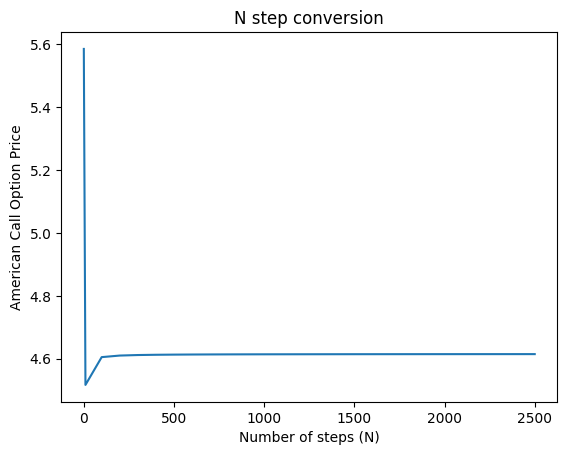

In [ ]:
N_steps = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]
plt.plot(N_steps, np.array(price_array))
plt.title("N step conversion")
plt.xlabel("Number of steps (N)")
plt.ylabel("American Call Option Price")


for N =   1, The price is 4.34
for N =  10, The price is 3.43
for N = 100, The price is 3.47
for N = 200, The price is 3.48
for N = 300, The price is 3.48
for N = 400, The price is 3.48
for N = 500, The price is 3.48
for N = 600, The price is 3.48
for N = 700, The price is 3.48
for N = 800, The price is 3.48
for N = 900, The price is 3.48
for N = 1000, The price is 3.48
for N = 1500, The price is 3.48
for N = 2000, The price is 3.48
for N = 2500, The price is 3.48


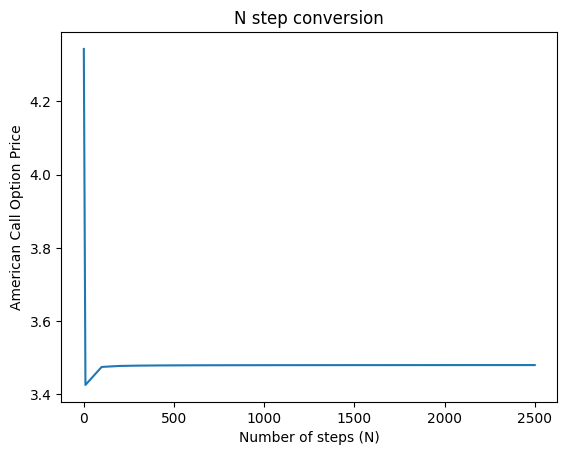

In [ ]:
S0 = 100 # Initial stock price
K = 100 # Strike price
T = 0.25 # Time to maturity in years
r = 0.05 # Risk-free interest rate
sigma = 0.2 # Initial volatility
N = 100 # Number of steps
opttype = "P" # Option type (call or put)
dv = 0.05 # Change in volatility
# call_prices, C, S, V = american_option_vol(S0, K, T, r, sigma, N, opttype, dv)
price_array = []
for N_steps in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500 ]:
    call_prices, C, S, V, Delta = american_option_vol_(S0, K, T, r, sigma, N_steps, opttype, dv)
    price_array.append(call_prices)
    print("for N = {:3d}, The price is {:.2f}".format(N_steps, call_prices))
N_steps = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]
plt.plot(N_steps, np.array(price_array))
plt.title("N step conversion")
plt.xlabel("Number of steps (N)")
plt.ylabel("American Call Option Price")
plt.show()

S0 = 100 # Initial stock price
K = 100 # Strike price
T = 0.25 # Time to maturity in years
r = 0.05 # Risk-free interest rate
sigma = 0.2 # Initial volatility
N = 100 # Number of steps
opttype = "C" # Option type (call or put)
dv = 0.05 # Change in volatility
# call_prices, C, S, V = american_option_vol(S0, K, T, r, sigma, N, opttype, dv)

### 8a.
Total number of steps choosen to achieve reliable convenient estaimate is 200 steps for Call and 200 Steps for Put option


8b. I ran iterartion on the binomial tree model with steps from 1 to 2500, from the image above the otion price was stable at 200 steps for Call with a price of 4.61 and similarly the put option price of 3.48 at 200 steps.

In [ ]:
S0 = 100 # Initial stock price
K = 100 # Strike price
T = 0.25 # Time to maturity in years
r = 0.05 # Risk-free interest rate
sigma = 0.2 # Initial volatility
N = 100 # Number of steps
opttype = "C" # Option type (call or put)
dv = 0.05 # Change in volatility
call_prices, C, S, V, Delta = american_option_vol_(S0, K, T, r, sigma, N, opttype, dv)
print("The Delta at t = 0 for the American call option price is {:.2f}".format(Delta[0, 0]))

The Delta at t = 0 for the American call option price is 0.57


In [ ]:
S0 = 100 # Initial stock price
K = 100 # Strike price
T = 0.25 # Time to maturity in years
r = 0.05 # Risk-free interest rate
sigma = 0.2 # Initial volatility
N = 100 # Number of steps
opttype = "P" # Option type (call or put)
dv = 0.05 # Change in volatility
call_prices, C, S, V, Delta = american_option_vol_(S0, K, T, r, sigma, N, opttype, dv)
print("The Delta at t = 0 for the American put option price is {:.2f}".format(Delta[0,0]))

The Delta at t = 0 for the American put option price is -0.45


9a: The Call Delta is positive and the Put Delta is negative. This means that the call option's price increases when the underlying asset's price increases, and vice versa. The put option's price decreases when the underlying asset's price increases, and vice versa.


9b. The Delta of an option measures the sensitivity of the option's price to changes in the underlying asset's price. It can be interpreted as the approximate change in the option's price for a small change in the underlying asset's price, holding other factors constant.

It makes sense to obtain a positive Delta for a call option because a call option gives the holder the right to buy the underlying asset at a fixed strike price. Therefore, when the underlying asset's price increases, the call option becomes more valuable as it allows the holder to buy the asset at a lower price than the market price.

It makes sense to obtain a negative Delta for a put option because a put option gives the holder the right to sell the underlying asset at a fixed strike price. Therefore, when the underlying asset's price decreases, the put option becomes more valuable as it allows the holder to sell the asset at a higher price than the market price.

In [ ]:
S0 = 100 # Initial stock price
K = 100 # Strike price
T = 0.25 # Time to maturity in years
r = 0.05 # Risk-free interest rate
sigma = 0.2 # Initial volatility
N = 200 # Number of steps
opttype = "P" # Option type (call or put)
dv = 0.05 # Change in volatility
put_prices, C, S, V, Delta = american_option_vol_(S0, K, T, r, sigma, N, opttype, dv)
print("The price of American Put option at {}% volatility is {:.2f}".format(sigma *100, put_prices))

The price of American Put option at 20.0% volatility is 3.48


In [ ]:
## Increased volatility by 5%
S0 = 100 # Initial stock price
K = 100 # Strike price
T = 0.25 # Time to maturity in years
r = 0.05 # Risk-free interest rate
sigma = 0.2# Initial volatility
N = 200 # Number of steps
opttype = "P" # Option type (call or put)
dv = 0.05 # Change in volatility
put_prices_in, C, S, V, Delta = american_option_vol_(S0, K, T, r, sigma + 0.05, N, opttype, dv)
print("The price of American Put option at {:.2f} % volatility which represent 5% increament is {:.2f}".format((sigma + 0.05) *100, put_prices_in))

The price of American Put option at 25.00 % volatility which represent 5% increament is 4.46


In [ ]:
print("The vega of the call option is approximately equal to ${:.4f}".format(put_prices_in - put_prices))

The vega of the call option is approximately equal to $0.9792


Using the above we can say that due to 5% change in the volatilty of the undrlying asset, the price of the option will change approximately $0.9783

In [ ]:
call_prices, C, S, V, Delta = american_option_vol_(S0, K, T, r, sigma, N, "C", dv)
print("The price of American Call option at {:.2f} % volatility is {:.2f}".format(sigma *100, call_prices))

The price of American Call option at 20.00 % volatility is 4.61


In [ ]:
call_prices_in, C, S, V, Delta = american_option_vol_(S0, K, T, r, sigma + 0.05, N, "C", dv)
print("The price of American Call option at {:.2f} % volatility which represent 5% increament is {:.2f}".format(sigma *100, call_prices_in))

The price of American Call option at 20.00 % volatility which represent 5% increament is 5.59


In [ ]:
print("The vega of the call option is approximately equal to ${:.4f}".format(call_prices_in - call_prices))

The vega of the call option is approximately equal to $0.9822


b. From the above we can say that due to 5% change in the volatilty of the undrlying asset, the price of the call option will change approximately 0.9822 and 0.9792 for the American put option

## Step 2

17.  

In [ ]:
def _gen_stock_vec(s0, nb, sigma, h):
    # s0 = 100
    # sigma = 0.5
    up = np.exp(sigma * np.sqrt(2 * h))
    down = 1 / up # down movement to force a recombining tree

    vec_u = up * np.ones(nb)
    np.cumprod(vec_u, out=vec_u) # Computing u, u^2, u^3 ..., u^nb

    vec_d = down * np.ones(nb)
    np.cumprod(vec_d, out=vec_d)

    res = np.concatenate(
        (vec_d[::-1], [1.0], vec_u)
    ) # putting together the last period tree underlyings

    res *= s0
    return res

In [ ]:
def price(s0, K,  r, T,  nb_steps, sigma, opttype):
    # r = 0
    # sigma = 0.5
    # T = 1
    # K = 130
    h = T / nb_steps
    discount = np.exp(-r * h)  # Define discount factor for simplicity

    # Define risk-neutral prob
    pu = (
        (np.exp(r * h / 2) - np.exp(-sigma * np.sqrt(h / 2)))
        /(np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))
    ) ** 2
    pd = (
        (- np.exp(r * h / 2) + np.exp(sigma * np.sqrt(h / 2)))
        /(np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))
    ) ** 2

    pm = 1 - pu - pd
    # print(pu, pd, pm)

    # This would be our underlying evolution
    s = _gen_stock_vec(s0, nb_steps, sigma, h)

    # Define payoff
    if opttype == "C":
        final_payoff = np.maximum(s - K, 0)
    else:
        final_payoff = np.maximum(K - s, 0)
    nxt_vec_prices = final_payoff

    # Proceed with iterations for the calculation of payoffs
    for i in range(1, nb_steps + 1):
        vec_stock = _gen_stock_vec(s0, nb_steps-i, sigma, h)
        expectation = np.zeros(vec_stock.size)
        # print(vec_stock)

        for j in range(expectation.size):
            tmp = nxt_vec_prices[j] * pd
            tmp += nxt_vec_prices[j + 1] * pm
            tmp += nxt_vec_prices[j + 2] * pu

            expectation[j] = tmp
            # print(expectation)
            # if opttype == "C":
            #     expectation[j] = max(expectation[j], vec_stock[j] - K)
            # else:
            #     expectation[j] = max(expectation[j], K - vec_stock[j] )
        nxt_vec_prices = discount * expectation
    return nxt_vec_prices[0]


Text(0, 0.5, 'Option Price')

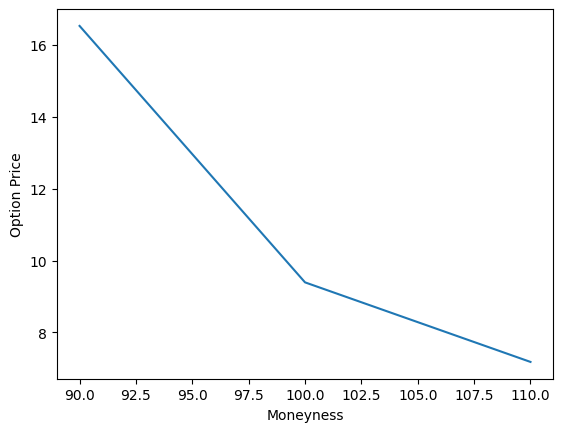

In [ ]:
Call_option_price_arrau = []
for i in range(90, 115, 5):
    Call_option_price_arrau.append(price(100, i, 0.05, 0.25, 1, 0.5, "C"))
Strike_price = [round((i/100) * 100, 2) for i in range(90, 115, 5)]
plt.plot(Strike_price, np.array(Call_option_price_arrau))
plt.xlabel("Moneyness")
plt.ylabel("Option Price")

Text(0, 0.5, 'Option Price')

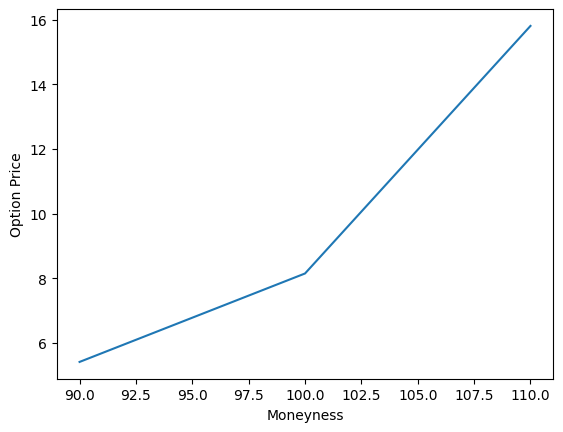

In [ ]:
put_option_price_arrau = []
for i in range(90, 115, 5):
    put_option_price_arrau.append(price(100, i, 0.05, 0.25, 1, 0.5, "P"))
Strike_price = [round((i/100) * 100, 2) for i in range(90, 115, 5)]
plt.plot(Strike_price, np.array(put_option_price_arrau))
plt.xlabel("Moneyness")
plt.ylabel("Option Price")

18.  At S0 = 100 the value of the call option decrease with moneyness and the inverse was observed for put option where there is a continous increase increase in price.

In [ ]:
S0 = 180 # Initial stock price
K = 182 # Strike price
T = 6 # Time to maturity in years
r = 0.02 # Risk-free interest rate
sigma = 0.25 # Initial volatility
N = 25 # Number of steps
opttype = "P" # Option type (call or put)
dv = 0.05 # Change in volatility
call_prices, C, S, V, Delta = american_option_vol_(S0, K, T, r, sigma, N, opttype, dv)

In [ ]:
import pandas as pd
delta_path = pd.DataFrame(Delta.round(4))[0]
delta_path = pd.DataFrame({"Delta": delta_path.values})
S_path = pd.DataFrame(S.round(4))[0]
S_path = pd.DataFrame({"Stock Prices": S_path.values})
stock_delta = pd.concat([S_path, delta_path], axis = 1)
# stock_delta["N0 Shares"] = stock_delta["Delta"].diff()
# stock_delta["N0 Shares"][0] = stock_delta["Delta"][0]
stock_delta

,Stock Prices,Delta
0,180.0000,-0.3571
1,159.2511,-0.4553
2,140.8940,-0.5693
3,124.6529,-0.6979
4,110.2840,-0.8395
5,97.5714,-0.9593
6,86.3242,-1.0000
7,76.3735,-1.0000
8,67.5698,-1.0000
9,59.7809,-1.0000


27b.  We choose the path that the stock price will continue to go down i.e $d^{25}$. from the price evolution table at the S0(initial price 180) we write a sell a put option and sell or short 0.3571 units of the stock, As time progresses, the stock price decreases, the delta becomes more negative(closer to -1) as the stock price fall. This implies the option become more sensitive to changes in the stock price and we should increase our short position in the stock to maintain a neutral or slightly positive Delta.
At time 6 onward, the stock prices is $86,3242 and the Delta is -1, which means that our option now tracks the stock movement. The Delta is -1 because American put option behaves like a short position in the stock when its' deeply in the money. As the stock price continues to fall, the Delta remains at -1, indicating that we maintain a perfectly offsetting short position in the stock.